In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
train_df=pd.read_csv('../input/chinese-traffic-signs/annotations.csv')

In [3]:
train_df.head()

,file_name,width,height,x1,y1,x2,y2,category
0,000_0001.png,134,128,19,7,120,117,0
1,000_0002.png,165,151,23,12,149,138,0
2,000_0003.png,128,122,22,14,116,105,0
3,000_0010.png,80,73,14,8,67,63,0
4,000_0011.png,186,174,36,15,155,157,0


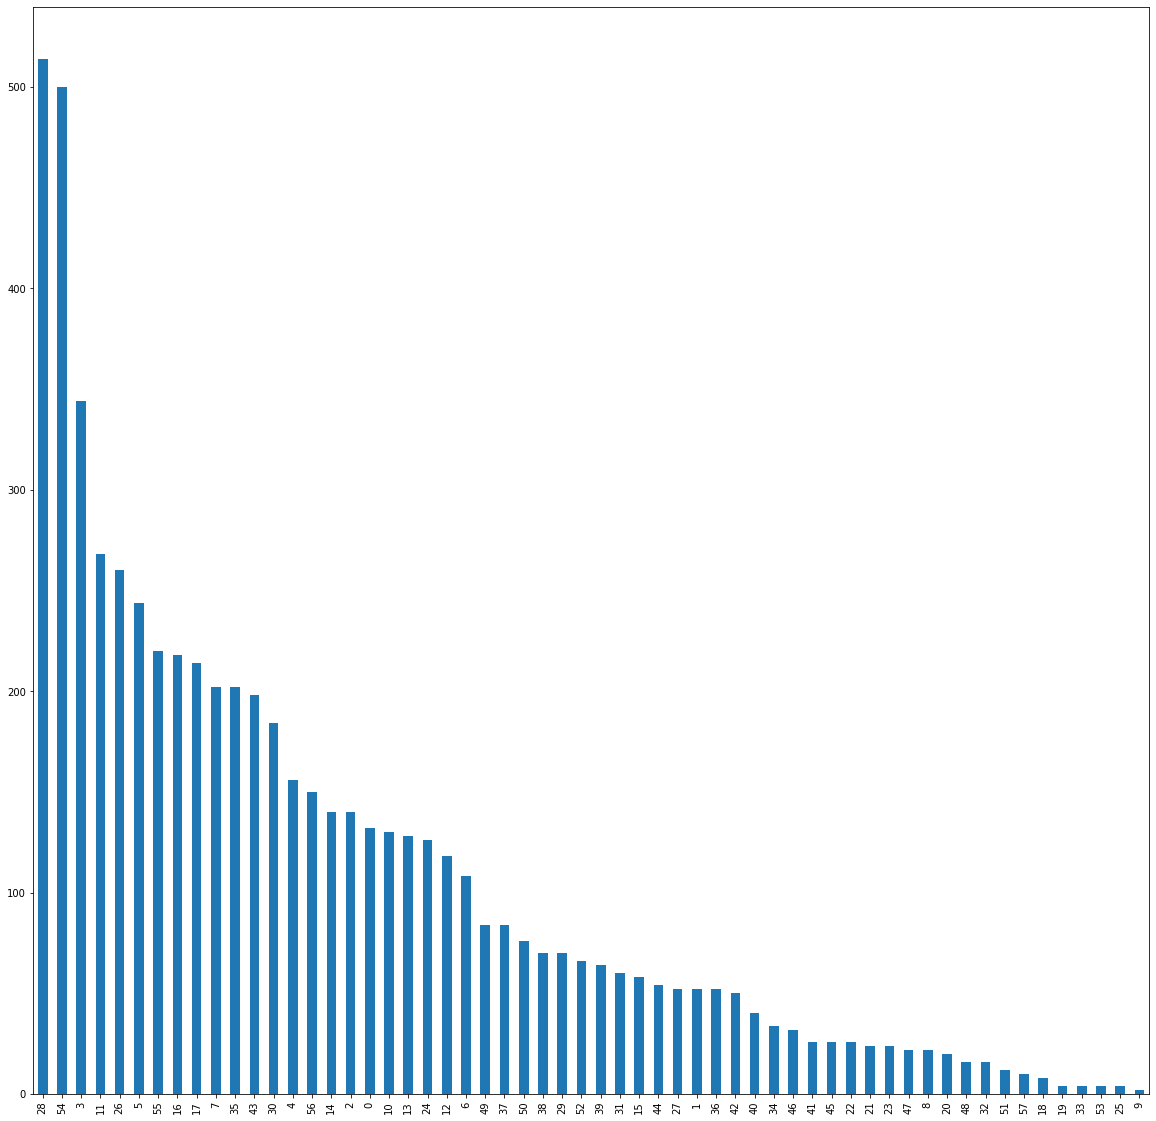

In [4]:
plt.figure(figsize=(20,20))
train_df['category'].value_counts().plot(kind='bar')
plt.show()

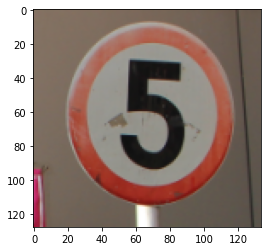

In [5]:
path='../input/chinese-traffic-signs/images/000_0001.png'
img=plt.imread(path)
plt.imshow(img)

In [6]:
img.shape

(128, 134, 3)

In [7]:
train_df['category'] = train_df['category'].astype('str')

In [8]:
from keras.applications.mobilenet_v2 import  preprocess_input
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            
            preprocessing_function=preprocess_input,
            validation_split=0.1,
            featurewise_center=False,
            featurewise_std_normalization=False,
            rotation_range=15,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
            
            )

In [9]:
        # Train generator
train_generator = datagen.flow_from_dataframe(
            dataframe=train_df,
            directory="../input/chinese-traffic-signs/images",
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="training",
            batch_size=16,
            seed=42,
            shuffle=True,
            class_mode="categorical",
            target_size=(224,244))
        print('Train generator created')
        

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/root/.local/lib/python3.7/site-packages/log.py", line 16, in format
    msg = super(_LogFormatter, self).format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_

Found 5548 validated image filenames belonging to 58 classes.
Train generator created


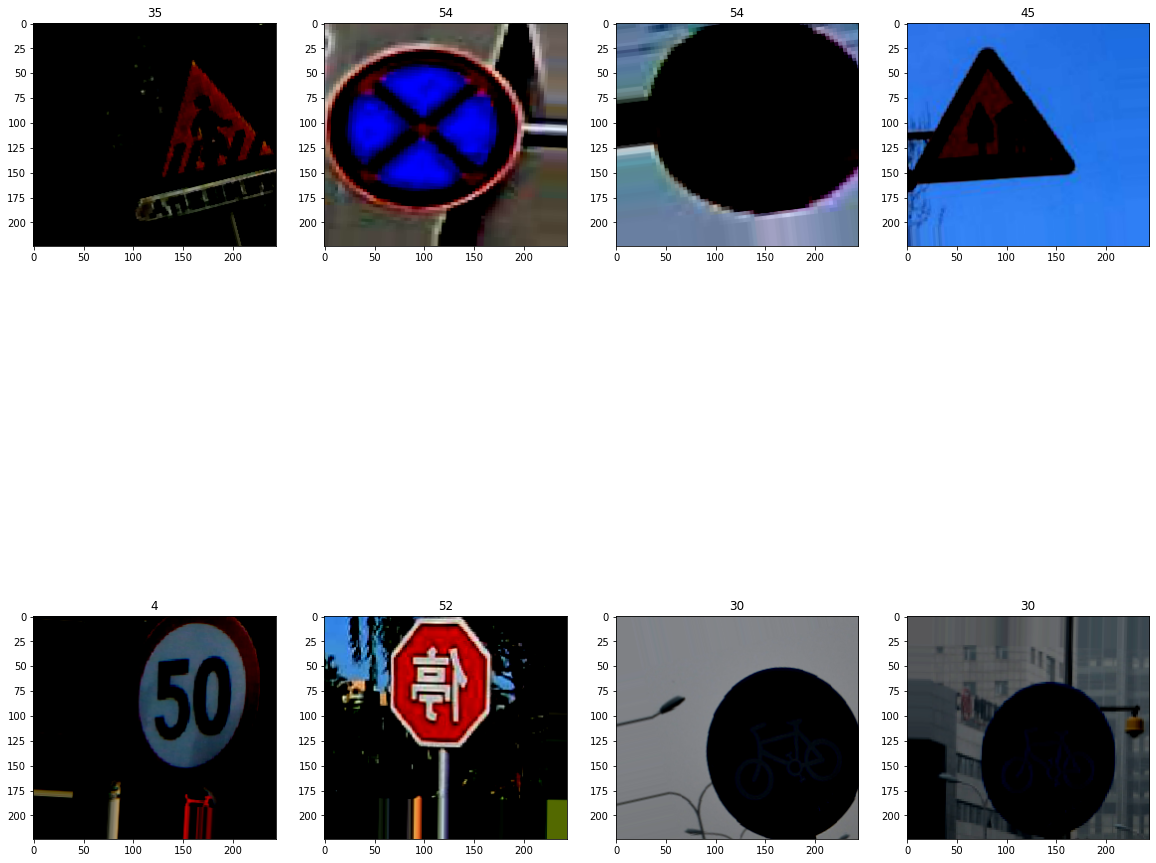

In [10]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [11]:
from keras.applications.mobilenet_v2 import  preprocess_input
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            
            preprocessing_function=preprocess_input,
            validation_split=0.1,
            
            )

In [45]:
# Validation generator
val_generator = datagen.flow_from_dataframe(
            dataframe=train_df,
            directory='../input/chinese-traffic-signs/images',
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="validation",
            batch_size=16,
            seed=42,
            shuffle=False,
            class_mode="categorical",
            target_size=(224,224)) 


--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/root/.local/lib/python3.7/site-packages/log.py", line 16, in format
    msg = super(_LogFormatter, self).format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_

Found 616 validated image filenames belonging to 58 classes.


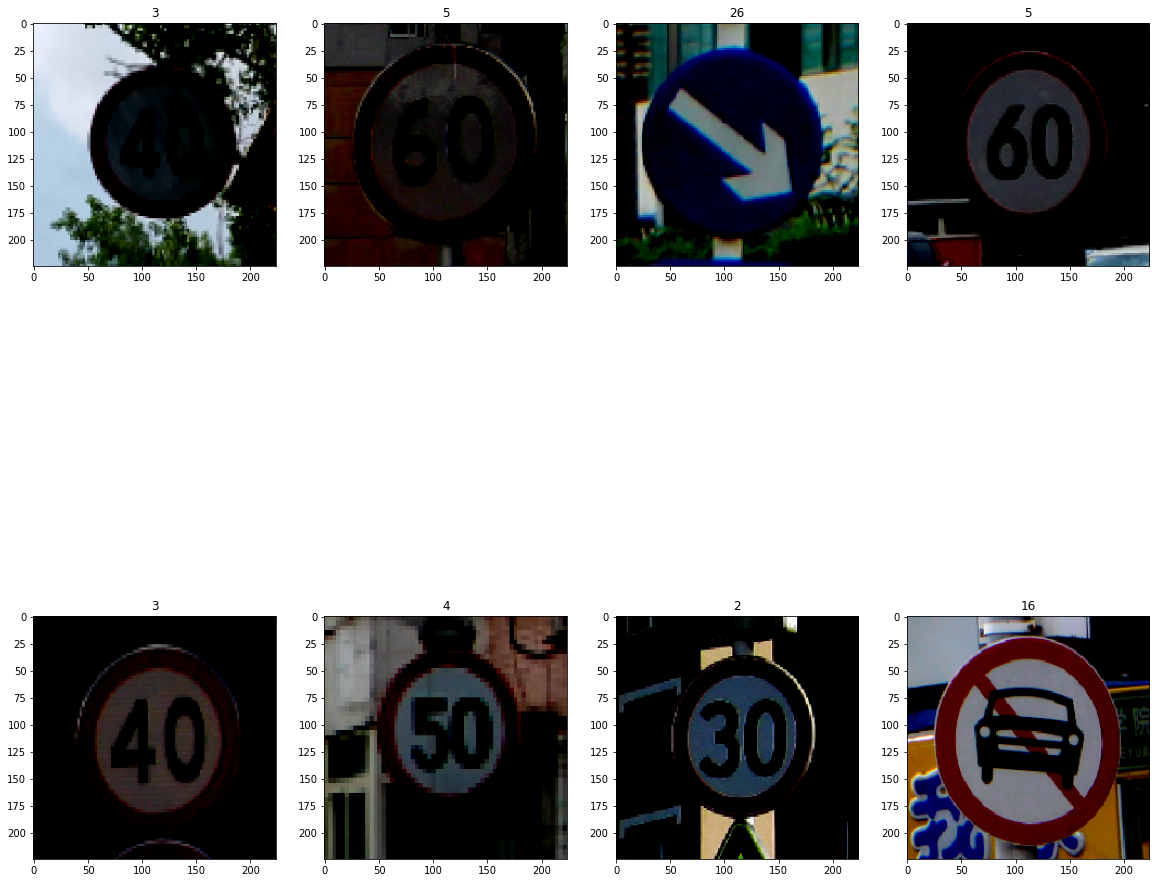

In [13]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in val_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [14]:
len(classes)

58

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [16]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [17]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('Trafic_sign.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [18]:
from keras.applications.mobilenet_v2 import MobileNetV2
mb=MobileNetV2(include_top=False,input_shape=(224,224,3),weights='imagenet')

2022-02-06 14:57:37.922611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-06 14:57:38.073340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-06 14:57:38.074420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-06 14:57:38.076691: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

9420800/9406464 [==============================] - 0s 0us/step


In [19]:
mb.trainable=False

In [32]:
model = Sequential()
model.add(mb)
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 1024 , activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 58 , activation = 'softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               32113152  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [34]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])

In [67]:
history=model.fit(train_generator,validation_data=val_generator,epochs=100,batch_size=16,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(val_generator)//16,
                  callbacks=callback, verbose=1)

Epoch 1/100
21/21 [==============================] - 5s 232ms/step - loss: 0.2244 - accuracy: 0.9286 - val_loss: 0.0731 - val_accuracy: 0.9688

Epoch 00001: val_loss improved from 0.08856 to 0.07311, saving model to Trafic_sign.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
21/21 [==============================] - 6s 278ms/step - loss: 0.2116 - accuracy: 0.9405 - val_loss: 0.0707 - val_accuracy: 0.9688

Epoch 00002: val_loss improved from 0.07311 to 0.07066, saving model to Trafic_sign.hdf5
Epoch 3/100
21/21 [==============================] - 6s 263ms/step - loss: 0.2003 - accuracy: 0.9405 - val_loss: 0.0724 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 0.07066
Epoch 4/100
21/21 [==============================] - 5s 234ms/step - loss: 0.2416 - accuracy: 0.9217 - val_loss: 0.0841 - val_accuracy: 0.9688

Epoch 00004: val_loss did not improve from 0.07066
Epoch 5/100
21/21 [==============================] - 5s 252ms/step - loss: 0.2503 - accuracy: 0.9286 - val_loss: 0.0864 - val_accuracy: 0.9688

Epoch 00005: val_loss did not improve from 0.07066
Epoch 6/100
21/21 [==============================] - 5s 234ms/step - loss: 0.1969 - accuracy: 0.9435 - val_loss: 0.0731 - val_accuracy: 1.0000

Epoch 00006: val_loss did not improve 

In [68]:
loss,acc=model.evaluate(val_generator)

39/39 [==============================] - 3s 70ms/step - loss: 0.1461 - accuracy: 0.9627


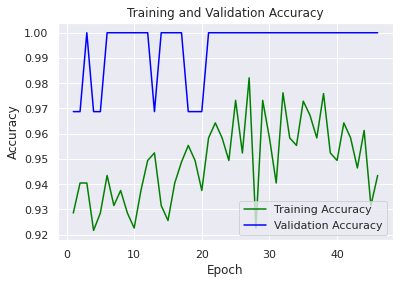

<Figure size 432x288 with 0 Axes>

In [69]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.show()

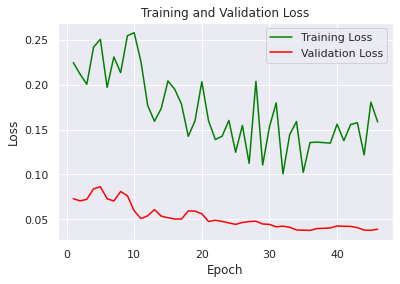

In [70]:
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

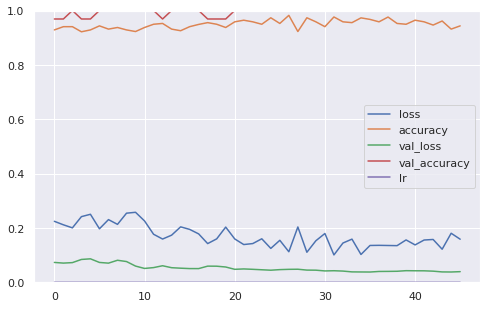

In [71]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [72]:
predictions = model.predict(val_generator)

In [73]:
predictions[:5]

array([[9.99920607e-01, 4.75397501e-05, 1.38493618e-07, 1.09307121e-05,
        3.38418893e-09, 3.75558159e-07, 5.53183372e-06, 9.84349640e-07,
        1.96524290e-08, 2.23393670e-07, 2.32008706e-08, 2.77978511e-08,
        9.95347023e-07, 1.08091189e-08, 8.32774472e-09, 1.24007551e-08,
        2.10505724e-09, 5.16490282e-08, 3.81598753e-08, 5.48637386e-11,
        3.43931994e-08, 8.21785584e-10, 9.42268041e-10, 2.87847457e-09,
        5.63753988e-10, 2.03377610e-07, 5.82037352e-08, 3.20237802e-07,
        2.71250844e-08, 5.21357346e-10, 1.24858102e-09, 5.71337155e-09,
        2.95293159e-08, 7.63261951e-08, 6.11097448e-07, 1.24203248e-09,
        2.68656142e-09, 2.20546511e-07, 1.56889826e-07, 5.90715032e-08,
        1.01864090e-08, 3.02626404e-08, 1.29380973e-09, 3.13232533e-08,
        2.40440059e-08, 6.91434323e-08, 2.13892104e-09, 1.13677494e-08,
        9.12321411e-07, 6.42630823e-07, 3.21277394e-10, 2.32225759e-07,
        7.96464064e-06, 1.64566131e-07, 2.39073813e-07, 8.001220

In [74]:
from sklearn.metrics import classification_report
print(classification_report(val_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00         4
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        30
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         2
          12       0.97      0.97      0.97        32
          13       1.00      0.83      0.91         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         4
          17       0.97    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

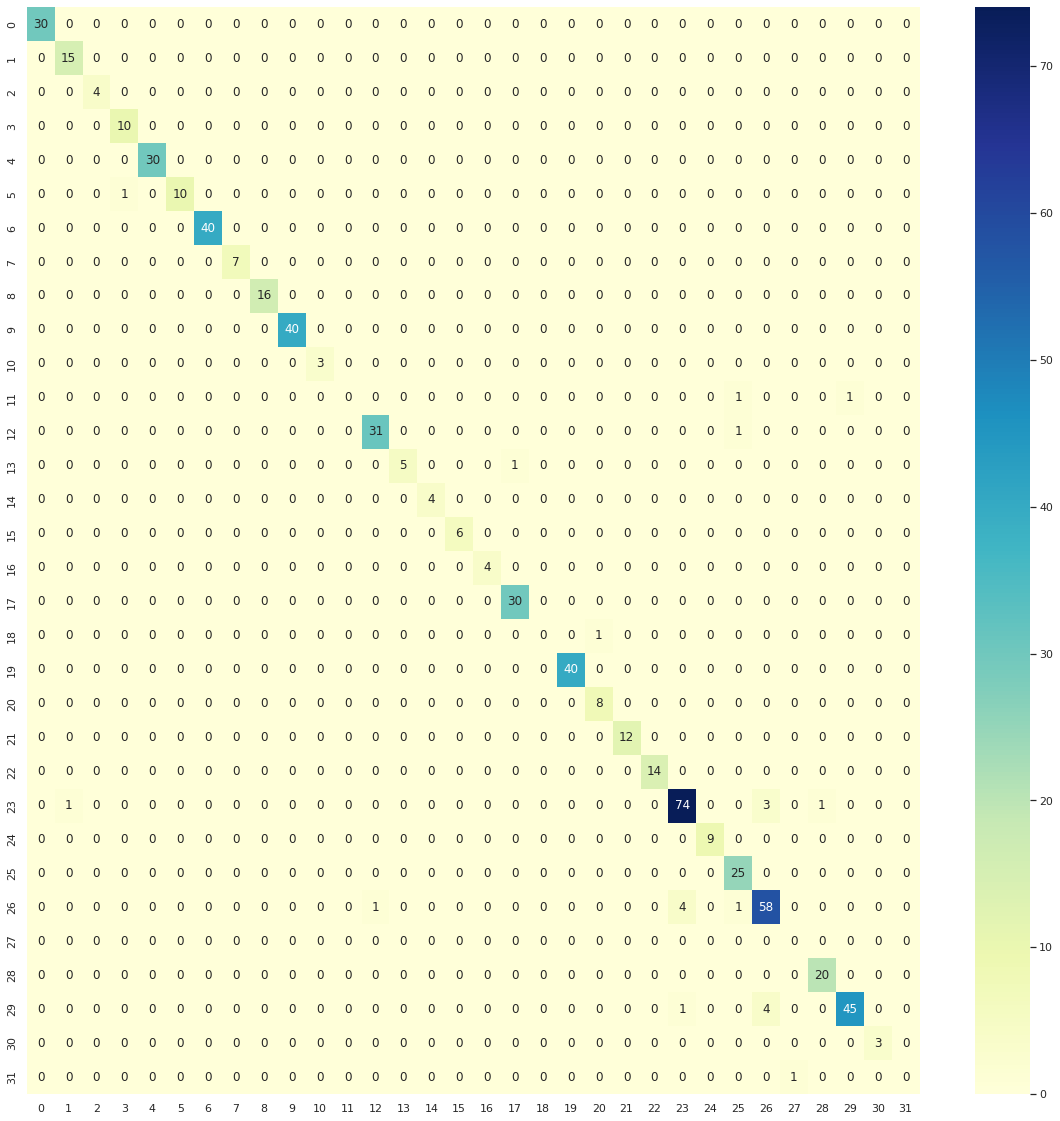

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")